In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='once')

NameError: name 'warnings' is not defined

In [55]:
subDataFile = ".\\dataProfitMarginSubset.csv"
subsetData = pd.read_csv(subDataFile)
subsetData.head(3)

subsetData = subsetData.drop_duplicates('id')

In [81]:
print("Shape with null vals {0}".format(subsetData.shape))
subNonNull = subsetData.dropna()
print("Shape with null vals {0}".format(subNonNull.shape))


values = {}

columnList = ['actorsTot_AveRating', 'actorsTot_RankedAveRating', 'actorsTot_VoteAve',
       'actorsTot_RankedVoteAve', 'actorsTot_HistAve',
       'actorsTot_RankedHistAve', 'directorTot_AveRating',
       'directorTot_RankedAveRating', 'screenwriterTot_AveRating',
       'screenwriterTot_RankedAveRating', 'editorTot_AveRating',
       'editorTot_RankedAveRating', 'keywordTot_AveRating',
       'genreTot_RankedAveRating'];

for col in columnList:
    values[col] = np.mean(subsetData[col])
    

subNonNull = subsetData[subsetData['BoxOfficeProfitMargin'].notna()]
subNonNull = subNonNull.fillna(value = values)
subNonNull= subNonNull.dropna()

subNonNull['profitRatio'] = subNonNull['Domestic']/subNonNull['budget']
subNonNull = subNonNull.drop_duplicates('id')

print(subNonNull.columns)

Shape with null vals (7592, 29)
Shape with null vals (1904, 29)
Index(['id', 'title', 'production_companies', 'production_countries', 'adult',
       'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count',
       'actorsTot_AveRating', 'actorsTot_RankedAveRating', 'actorsTot_VoteAve',
       'actorsTot_RankedVoteAve', 'actorsTot_HistAve',
       'actorsTot_RankedHistAve', 'directorTot_AveRating',
       'directorTot_RankedAveRating', 'screenwriterTot_AveRating',
       'screenwriterTot_RankedAveRating', 'editorTot_AveRating',
       'editorTot_RankedAveRating', 'keywordTot_AveRating',
       'genreTot_RankedAveRating', 'budget', 'revenue', 'Domestic',
       'BoxOfficeProfitMargin', 'profit_margin', 'profitRatio'],
      dtype='object')


In [82]:
subNonNull.loc[:,'release_date'] =subNonNull['release_date'].apply(pd.to_datetime)

### Summarize Data

In [83]:
print(list(subNonNull.columns))
print(subNonNull.dtypes)

['id', 'title', 'production_companies', 'production_countries', 'adult', 'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count', 'actorsTot_AveRating', 'actorsTot_RankedAveRating', 'actorsTot_VoteAve', 'actorsTot_RankedVoteAve', 'actorsTot_HistAve', 'actorsTot_RankedHistAve', 'directorTot_AveRating', 'directorTot_RankedAveRating', 'screenwriterTot_AveRating', 'screenwriterTot_RankedAveRating', 'editorTot_AveRating', 'editorTot_RankedAveRating', 'keywordTot_AveRating', 'genreTot_RankedAveRating', 'budget', 'revenue', 'Domestic', 'BoxOfficeProfitMargin', 'profit_margin', 'profitRatio']
id                                          int64
title                                      object
production_companies                       object
production_countries                       object
adult                                        bool
popularity                                float64
release_date                       datetime64[ns]
runtime                                   fl

#### Box Office Profit Margin over time

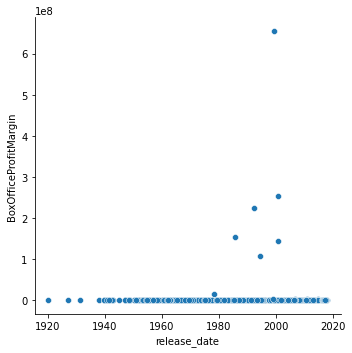

In [85]:
_ = sns.relplot(x='release_date',y='BoxOfficeProfitMargin',data=subNonNull)
plt.show()

### Adult Vs Non Adult Profit Margin over time

In [86]:
adultGrouped = subNonNull.groupby('adult')
adultGrouped['BoxOfficeProfitMargin'].describe()

count           mean           std      min        25%       50%  \
adult                                                                      
True   5644.0  279014.874277  1.032168e+07 -99.9985 -61.873593  2.992364   

             75%          max  
adult                          
True   128.05531  655225400.0

#### Only adult films remain in dataset, not useful parameter unfortunately

## Profit margin descriptions

In [87]:
margins = subNonNull[['BoxOfficeProfitMargin','profit_margin', 'profitRatio']]
margins.describe()

BoxOfficeProfitMargin  profit_margin   profitRatio
count           5.644000e+03   5.644000e+03  5.644000e+03
mean            2.790149e+05   2.880594e+04  2.791149e+03
std             1.032168e+07   2.058197e+06  1.032168e+05
min            -9.999850e+01  -9.999991e+01  1.500000e-05
25%            -6.187359e+01  -2.574680e+01  3.812641e-01
50%             2.992364e+00   9.525014e+01  1.029924e+00
75%             1.280553e+02   3.051775e+02  2.280553e+00
max             6.552254e+08   1.545929e+08  6.552255e+06

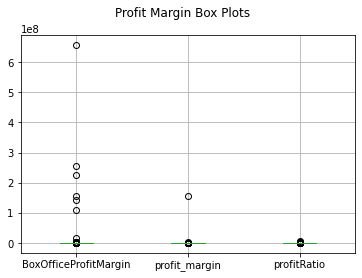

In [88]:
plt.suptitle('Profit Margin Box Plots')
margins.boxplot()
plt.show()

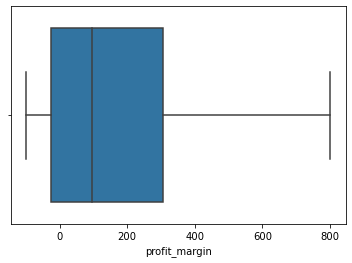

In [89]:
_=sns.boxplot(x = 'profit_margin', data=subNonNull, showfliers=False)
plt.show()

In [90]:
stdDev = subNonNull['BoxOfficeProfitMargin'].std()
subNonNullMean = subNonNull['BoxOfficeProfitMargin'].mean()

subNonNull[(subNonNull['BoxOfficeProfitMargin']>(subNonNullMean+3*stdDev))][['title','budget','revenue','Domestic','BoxOfficeProfitMargin']]

title  budget     revenue  \
226   City Slickers II: The Legend of Curly's Gold    40.0        43.0   
1290                                  Lost & Found     1.0       100.0   
1939                   Rugrats in Paris: The Movie    30.0       103.0   
1959                                       Pollock     6.0         8.0   
2927                      Kiss of the Spider Woman    11.0  17005229.0   
3011                                   Housesitter    26.0        94.0   

        Domestic  BoxOfficeProfitMargin  
226   43622150.0           1.090553e+08  
1290   6552255.0           6.552254e+08  
1939  76507756.0           2.550258e+08  
1959   8598593.0           1.433098e+08  
2927  17005229.0           1.545929e+08  
3011  58500635.0           2.250023e+08

In [91]:
subNonNull = subNonNull[(subNonNull['BoxOfficeProfitMargin']>=(subNonNullMean+-3*stdDev))& \
                         (subNonNull['BoxOfficeProfitMargin']<=(subNonNullMean+3*stdDev))]

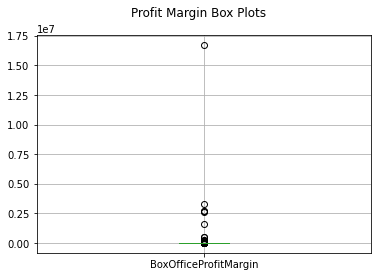

In [92]:
subNonNull[['BoxOfficeProfitMargin']].boxplot()
plt.suptitle('Profit Margin Box Plots')
plt.show()

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/675929514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subNonNull['logProfitRatio']= subNonNull[['profitRatio']].apply(lambda x: np.log(x))


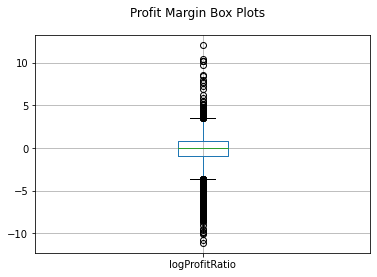

In [93]:
subNonNull['logProfitRatio']= subNonNull[['profitRatio']].apply(lambda x: np.log(x))
subNonNull[['logProfitRatio']].boxplot()
plt.suptitle('Profit Margin Box Plots')
plt.show()

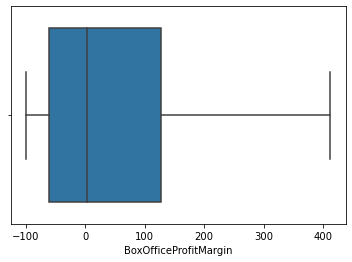

In [94]:
_=sns.boxplot(x = 'BoxOfficeProfitMargin', data=subNonNull, showfliers=False)
plt.show()

<AxesSubplot:>

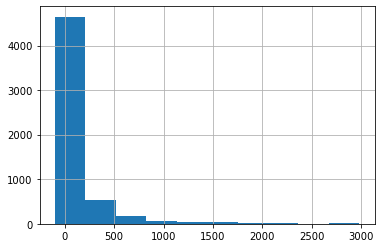

In [95]:
subNonNull[subNonNull['BoxOfficeProfitMargin']<3000]['BoxOfficeProfitMargin'].hist()

count    5571.000000
mean       -0.031051
std         1.583526
min        -4.323565
25%        -0.877593
50%         0.030976
75%         0.868464
max         6.719055
Name: BoxCox, dtype: float64


<AxesSubplot:>

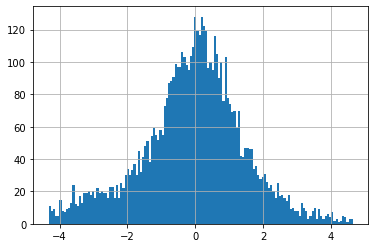

In [183]:
import scipy.stats

ret, val = scipy.stats.boxcox(subNonNull['profitRatio'])
subNonNull['BoxCox'] = ret
print(subNonNull['BoxCox'].describe())
std3greater = subNonNull['BoxCox'].std()*3+subNonNull['BoxCox'].mean()
std3less = subNonNull['BoxCox'].std()*-3+subNonNull['BoxCox'].mean()


subNonNull = subNonNull[(subNonNull['BoxCox'] <= std3greater) & (subNonNull['BoxCox'] >= std3less)]
subNonNull['BoxCox'].hist(bins=140)

##### Both chosen dependent variables are heavily grouped toward the low end 

## Correlation Matrix

In [97]:
subNonNull.corr()

id  adult  popularity   runtime  \
id                               1.000000    NaN    0.149720  0.005720   
adult                                 NaN    NaN         NaN       NaN   
popularity                       0.149720    NaN    1.000000  0.104399   
runtime                          0.005720    NaN    0.104399  1.000000   
vote_average                     0.012695    NaN    0.165731  0.347488   
vote_count                       0.079353    NaN    0.470327  0.227515   
actorsTot_AveRating              0.125739    NaN    0.256989  0.284285   
actorsTot_RankedAveRating        0.089357    NaN    0.179742  0.209026   
actorsTot_VoteAve                0.112736    NaN    0.251751  0.287222   
actorsTot_RankedVoteAve          0.083321    NaN    0.175569  0.208508   
actorsTot_HistAve                0.178233    NaN    0.240257  0.232281   
actorsTot_RankedHistAve          0.127531    NaN    0.205991  0.202287   
directorTot_AveRating            0.007038    NaN    0.063059  0.010792   
directorTot_RankedAveRating     -0.014859    NaN    0.059479  0.033285   
screenwriterTot_AveRating        0.000922    NaN    0.073373  0.054615   
screenwriterTot_RankedAveRating -0.003544    NaN    0.071346  0.068502   
editorTot_AveRating             -0.009889    NaN    0.062426  0.106401   
editorTot_RankedAveRating       -0.019918    NaN    0.058602  0.119534   
keywordTot_AveRating            -0.030964    NaN    0.071504  0.248904   
genreTot_RankedAveRating         0.042110    NaN   -0.055979  0.176537   
budget                          -0.006409    NaN    0.293708  0.214404   
revenue                          0.025598    NaN    0.432699  0.215182   
Domestic                        -0.033896    NaN    0.402824  0.184870   
BoxOfficeProfitMargin           -0.054692    NaN    0.046865 -0.050509   
profit_margin                   -0.022211    NaN    0.077463  0.002131   
profitRatio                     -0.054692    NaN    0.046865 -0.050509   
logProfitRatio                  -0.133538    NaN    0.137557 -0.021170   
BoxCox                          -0.130722    NaN    0.137658 -0.027325   

                                 vote_average  vote_count  \
id                                   0.012695    0.079353   
adult                                     NaN         NaN   
popularity                           0.165731    0.470327   
runtime                              0.347488    0.227515   
vote_average                         1.000000    0.333861   
vote_count                           0.333861    1.000000   
actorsTot_AveRating                  0.180270    0.453487   
actorsTot_RankedAveRating            0.128223    0.318002   
actorsTot_VoteAve                    0.180570    0.446731   
actorsTot_RankedVoteAve              0.128197    0.311375   
actorsTot_HistAve                    0.106933    0.418972   
actorsTot_RankedHistAve              0.112764    0.346278   
directorTot_AveRating                0.084018    0.078229   
directorTot_RankedAveRating          0.096580    0.074844   
screenwriterTot_AveRating            0.013484    0.118326   
screenwriterTot_RankedAveRating      0.018563    0.116500   
editorTot_AveRating                  0.011524    0.115989   
editorTot_RankedAveRating            0.016355    0.114576   
keywordTot_AveRating                 0.561215    0.169163   
genreTot_RankedAveRating             0.282965   -0.088933   
budget                              -0.003996    0.580875   
revenue                              0.179515    0.771157   
Domestic                             0.184732    0.740625   
BoxOfficeProfitMargin                0.159687    0.071549   
profit_margin                        0.181789    0.132258   
profitRatio                          0.159687    0.071549   
logProfitRatio                       0.186875    0.230535   
BoxCox                               0.197013    0.230107   

                                 actorsTot_AveRating  \
id                                          0.125739   
adult     

<AxesSubplot:>

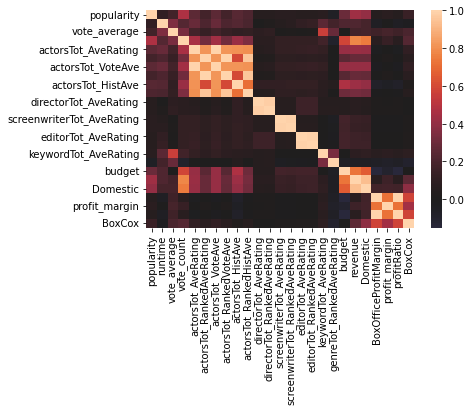

In [120]:
# Make a heatmap of the data 
subNonNullNumeric = subNonNull[['popularity', 'runtime', 'vote_average', 'vote_count', 'actorsTot_AveRating', 'actorsTot_RankedAveRating', 'actorsTot_VoteAve', 'actorsTot_RankedVoteAve', 'actorsTot_HistAve', 'actorsTot_RankedHistAve', 'directorTot_AveRating', 'directorTot_RankedAveRating', 'screenwriterTot_AveRating', 'screenwriterTot_RankedAveRating', 'editorTot_AveRating', 'editorTot_RankedAveRating', 'keywordTot_AveRating', 'genreTot_RankedAveRating', 'budget', 'revenue', 'Domestic', 'BoxOfficeProfitMargin', 'profit_margin','profitRatio','BoxCox']]
sns.heatmap(subNonNullNumeric.corr(), center = 0)

<AxesSubplot:>

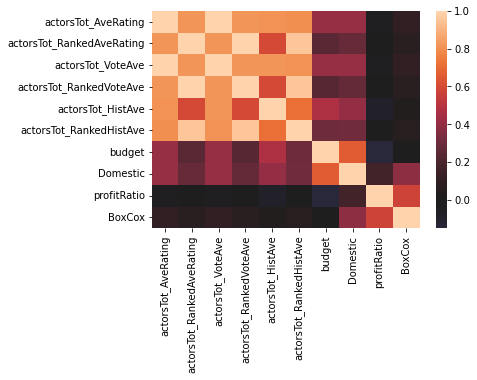

In [121]:
subset = subNonNull[['actorsTot_AveRating', 'actorsTot_RankedAveRating', 'actorsTot_VoteAve', 'actorsTot_RankedVoteAve', 'actorsTot_HistAve', 'actorsTot_RankedHistAve', 'budget', 'Domestic', 'profitRatio', 'BoxCox']]
sns.heatmap(subset.corr(), center = 0)

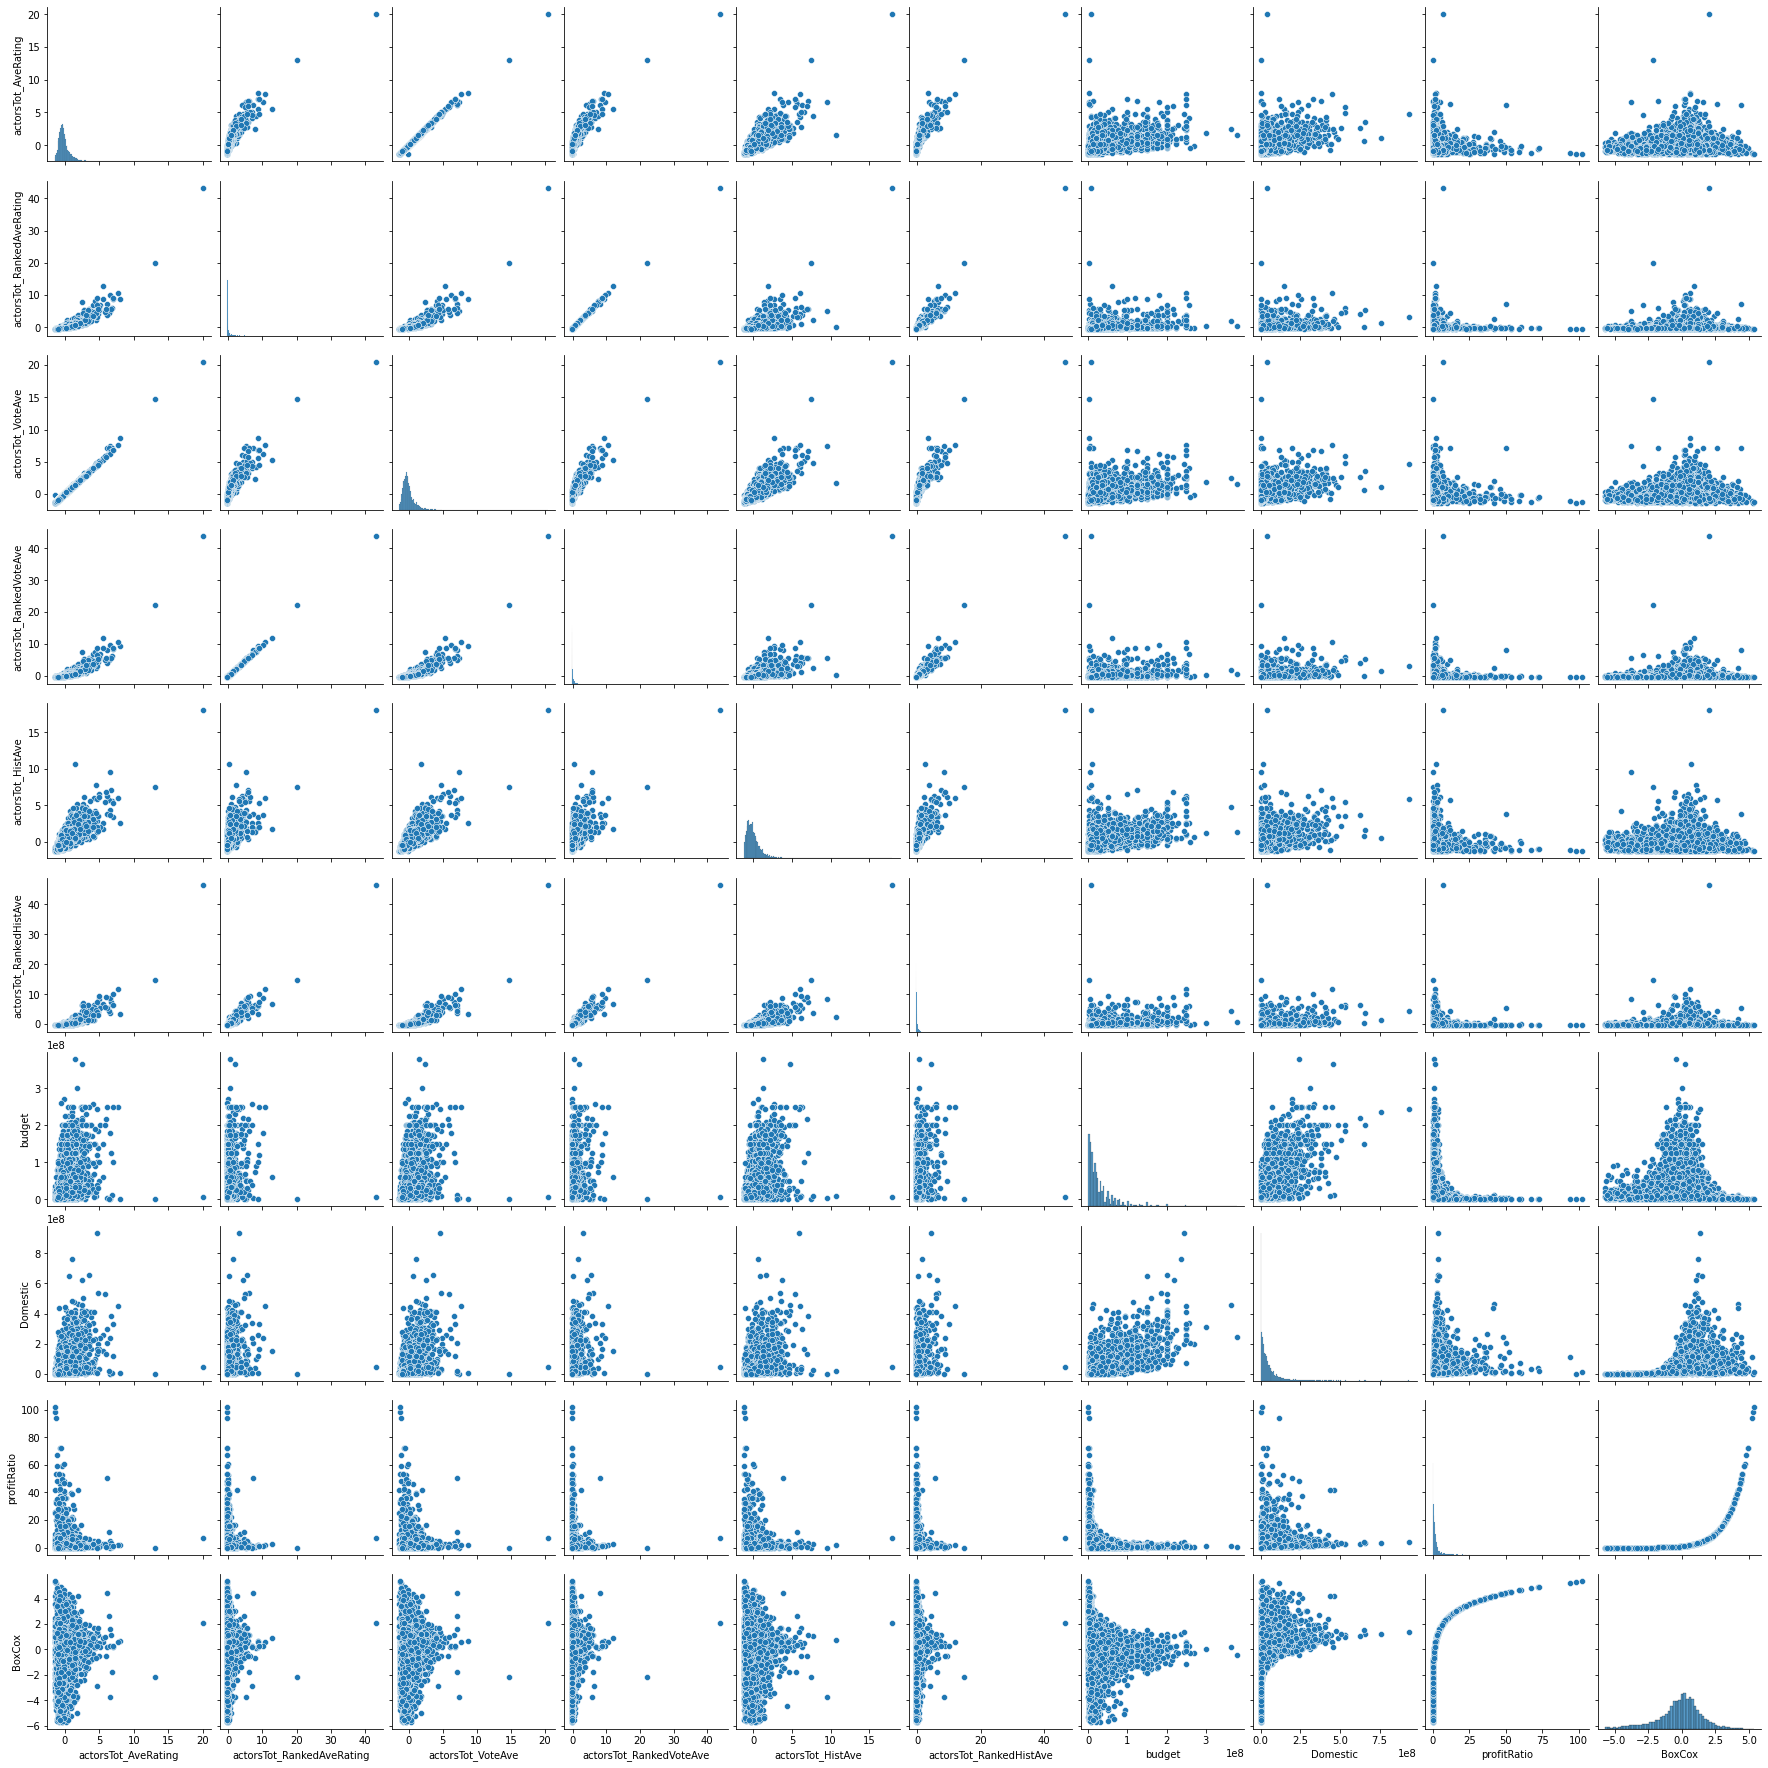

In [122]:
sns.pairplot(subset)

#### Seems there's almost no correlation between Box Office Profit Margin with any explanitory variable.  Same for profit_margin.  Linear Regression for these variables not recomended, but Multiple Linear regression may be able to add several weak correlations into something useful

#### There is some correlation between Domestic Box Office with budget, popularity, and vote_count.

### Normalize Columns

<AxesSubplot:>

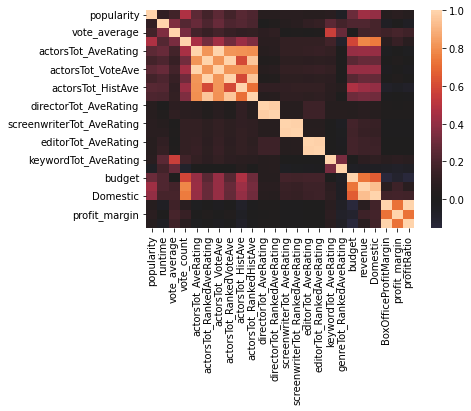

In [110]:
columnsToNormalize = ['popularity', 'runtime', 'vote_average', 'vote_count',
       'actorsTot_AveRating', 'actorsTot_RankedAveRating', 'actorsTot_VoteAve',
       'actorsTot_RankedVoteAve', 'actorsTot_HistAve',
       'actorsTot_RankedHistAve', 'directorTot_AveRating',
       'directorTot_RankedAveRating', 'screenwriterTot_AveRating',
       'screenwriterTot_RankedAveRating', 'editorTot_AveRating',
       'editorTot_RankedAveRating', 'keywordTot_AveRating',
       'genreTot_RankedAveRating']

for col in columnsToNormalize:
    thisColumn = subNonNull[col]
    subNonNull.loc[:,col] = (subNonNull[col]-thisColumn.mean())/thisColumn.std()

# Make a heatmap of the data 
subNonNullNormalizedNumeric = subNonNull[['popularity', 'runtime', 'vote_average', 'vote_count', 'actorsTot_AveRating', 'actorsTot_RankedAveRating', 'actorsTot_VoteAve', 'actorsTot_RankedVoteAve', 'actorsTot_HistAve', 'actorsTot_RankedHistAve', 'directorTot_AveRating', 'directorTot_RankedAveRating', 'screenwriterTot_AveRating', 'screenwriterTot_RankedAveRating', 'editorTot_AveRating', 'editorTot_RankedAveRating', 'keywordTot_AveRating', 'genreTot_RankedAveRating', 'budget', 'revenue', 'Domestic', 'BoxOfficeProfitMargin', 'profit_margin','profitRatio']]
sns.heatmap(subNonNullNormalizedNumeric.corr(), center = 0)

## Multiple Linear Regression

### Box Office Profit Margin

In [111]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
multRegDataX = subNonNullNumeric.loc[:, ~subNonNullNumeric.columns.isin(['BoxOfficeProfitMargin','profit_margin','release_date','revenue','Domestic','profitRatio'])]
multRegDataY = subNonNullNumeric[['Domestic']]

# Create constants for X, so the model knows its bounds
multRegDataX = sm.add_constant(multRegDataX)

# Split the data
X_trainMult, X_testMult, y_trainMult, y_testMult = train_test_split(multRegDataX, multRegDataY, test_size=0.25)

C:\Users\Karl\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [112]:
# Create the model
modelMult = sm.OLS(y_trainMult,X_trainMult)

# Fit the model
results = modelMult.fit()

In [113]:
# Evaluate the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Domestic   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     389.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:49:55   Log-Likelihood:                -79020.
No. Observations:                4178   AIC:                         1.581e+05
Df Residuals:                    4158   BIC:                         1.582e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2.591e+07   9.36e+05     27.677      0.000    2.41e+07    2.77e+07
popularity                       5.144e+06    6.9e+05      7.452      0.000    3.79e+06     6.5e+06
runtime                         -2.514e+06   7.06e+05     -3.563      0.000    -3.9e+06   -1.13e+06
vote_average                     -9.08e+05   8.59e+05     -1.057      0.290   -2.59e+06    7.76e+05
vote_count                        3.52e+07   9.37e+05     37.567      0.000    3.34e+07     3.7e+07
actorsTot_AveRating             -9.312e+07   1.73e+07     -5.393      0.000   -1.27e+08   -5.93e+07
actorsTot_RankedAveRating        6.234e+07   2.06e+07      3.020      0.003    2.19e+07    1.03e+08
actorsTot_VoteAve                9.946e+07   1.77e+07      5.633      0.000    6.48e+07    1.34e+08
actorsTot_RankedVoteAve         -6.496e+07   2.08e+07     -3.116      0.002   -1.06e+08   -2.41e+07
actorsTot_HistAve               -6.703e+06   1.65e+06     -4.051      0.000   -9.95e+06   -3.46e+06
actorsTot_RankedHistAve          2.904e+06   2.88e+06      1.007      0.314   -2.75e+06    8.56e+06
directorTot_AveRating             7.78e+05    2.9e+06      0.268      0.789   -4.91e+06    6.47e+06
directorTot_RankedAveRating      -1.24e+06   2.88e+06     -0.430      0.667   -6.89e+06    4.41e+06
screenwriterTot_AveRating       -2.053e+06   4.44e+06     -0.463      0.644   -1.08e+07    6.65e+06
screenwriterTot_RankedAveRating  2.241e+06   4.45e+06      0.504      0.614   -6.48e+06     1.1e+07
editorTot_AveRating             -2.243e+06   3.58e+06     -0.626      0.531   -9.27e+06    4.78e+06
editorTot_RankedAveRating        4.289e+06   3.59e+06      1.194      0.232   -2.75e+06    1.13e+07
keywordTot_AveRating             5.933e+05   7.66e+05      0.774      0.439   -9.09e+05     2.1e+06
genreTot_RankedAveRating         2.263e+06   6.81e+05      3.324      0.001    9.28e+05     3.6e+06
budget                              0.5666      0.022     25.661      0.000       0.523       0.610
==============================================================================
Omnibus:                     2363.448   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70526.824
Skew:                           2.145   Prob(JB):                         0.00
Kurtosis:                      22.666   Cond. No.                     2.96e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R squared value is .067, not a great deal of predictive power of this model

In [114]:
# Use our new model to make predictions
predictionMult = results.predict(X_testMult)

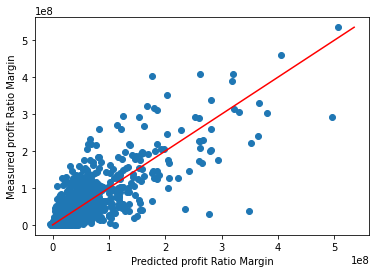

In [115]:
# Plot the predictions
# Build a scatterplot
plt.scatter(predictionMult, y_testMult)

# Add a line for perfect correlation. 
x = np.linspace(min(y_testMult['Domestic']), max(y_testMult['Domestic']), 1000)
plt.plot(x, x, color='r');

# Label it nicely
plt.xlabel("Predicted profit Ratio Margin")
plt.ylabel("Measured profit Ratio Margin")
plt.show()

## Separation of Production Companies

In [155]:
import ast
prodCompaniesDF = pd.DataFrame(columns=subNonNull.columns)

for i in range(len(subNonNull)):
    row = subNonNull.iloc[i]
    if row['production_companies'] == None or len(row['production_companies'])==0:
        continue
    prodComp = ast.literal_eval(row['production_companies'])
    for comp in prodComp:
        copyRow = row.copy()
        copyRow['ProductionCompany_Name'] = comp['name']
        copyRow['ProductionCompany_Id'] = comp['id']
        prodCompaniesDF= prodCompaniesDF.append(copyRow)


C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyRow)
C:\Users\Karl\AppData\Local\Temp/ipykernel_14904/3025209962.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prodCompaniesDF= prodCompaniesDF.append(copyR

In [157]:
prodCompaniesDF.head()

id             title                               production_companies  \
0    862         Toy Story     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1   8844           Jumanji  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
1   8844           Jumanji  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
1   8844           Jumanji  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  15602  Grumpier Old Men  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   

                                production_countries adult popularity  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...  True   0.884602   
1  [{'iso_3166_1': 'US', 'name': 'United States o...  True   0.521661   
1  [{'iso_3166_1': 'US', 'name': 'United States o...  True   0.521661   
1  [{'iso_3166_1': 'US', 'name': 'United States o...  True   0.521661   
2  [{'iso_3166_1': 'US', 'name': 'United States o...  True   0.131399   

          release_date   runtime vote_average vote_count  ...      budget  \
0  1995-10-30 00:00:00 -1.357278     1.610426   3.813332  ...  30000000.0   
1  1995-12-15 00:00:00 -0.247416     0.724586   1.377202  ...  65000000.0   
1  1995-12-15 00:00:00 -0.247416     0.724586   1.377202  ...  65000000.0   
1  1995-12-15 00:00:00 -0.247416     0.724586   1.377202  ...  65000000.0   
2  1995-12-22 00:00:00  -0.39218     0.281665  -0.506295  ...  25000000.0   

       revenue     Domestic BoxOfficeProfitMargin profit_margin profitRatio  \
0  373554033.0  223225679.0            644.085597    1145.18011    7.440856   
1  262797249.0  100499940.0             54.615292     304.30346    1.546153   
1  262797249.0  100499940.0             54.615292     304.30346    1.546153   
1  262797249.0  100499940.0             54.615292     304.30346    1.546153   
2   71500000.0   71518503.0            186.074012         186.0     2.86074   

  logProfitRatio    BoxCox ProductionCompany_Id     ProductionCompany_Name  
0       2.006986  2.139794                  3.0    Pixar Animation Studios  
1        0.43577  0.441825                559.0           TriStar Pictures  
1        0.43577  0.441825               2550.0               Teitler Film  
1        0.43577  0.441825              10201.0  Interscope Communications  
2        1.05108  1.086769               6194.0               Warner Bros.  

[5 rows x 34 columns]

In [182]:
prodGrouped = prodCompaniesDF.groupby('ProductionCompany_Id')

valCounts = prodGrouped.value_counts()
valCounts.keys()

MultiIndex([(    1.0,     11, ...),
            (    1.0,     85, ...),
            (    1.0,  27064, ...),
            (    1.0,     87, ...),
            (    1.0,     89, ...),
            (    1.0,    217, ...),
            (    1.0,    847, ...),
            (    1.0,   1891, ...),
            (    1.0,   1892, ...),
            (    1.0,   1893, ...),
            ...
            (95342.0,   9335, ...),
            (95343.0,  10030, ...),
            (95344.0,  10030, ...),
            (95345.0,  10030, ...),
            (95406.0, 177494, ...),
            (95593.0,  13767, ...),
            (95595.0,  15673, ...),
            (95596.0,  15489, ...),
            (95597.0,  15489, ...),
            (96043.0,  11468, ...)],
           names=['ProductionCompany_Id', 'id', 'title', 'production_companies', 'production_countries', 'adult', 'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count', 'actorsTot_AveRating', 'actorsTot_RankedAveRating', 'actorsTot_VoteAve', 'acto

## Conclusions and Next Steps

#### The parameters generated during data wrangling have almost no predictive power when but into a Multiple Linear Regression Model.  Perhaps nonlinear regression models or separating the profit margins into bins to be used in classification models will be more fruitful